In [1]:
# Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Regression, Amputation, & Testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

In [2]:
github_raw_csv_url = "https://raw.githubusercontent.com/NitoBoritto/Car_Sales_Regression_Analysis/master/car_resale_prices.csv"
Car_df = pd.read_csv(github_raw_csv_url)
Car_df

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,17441,2013 Honda Amaze VX i-Vtech,₹ 3.25 Lakh,Jul 2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18 kmpl,Sedan,Delhi
17442,17442,2016 Toyota Camry 2.5 Hybrid,₹ 20.75 Lakh,Jun 2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16 kmpl,Sedan,Delhi
17443,17443,2016 Toyota Corolla Altis GL MT,₹ 8.35 Lakh,Jun 2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28 kmpl,Sedan,Delhi
17444,17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,₹ 13.95 Lakh,Jun 2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01 kmpl,SUV,Delhi


# EDA

In [3]:
Car_df = Car_df.drop(columns="Unnamed: 0")

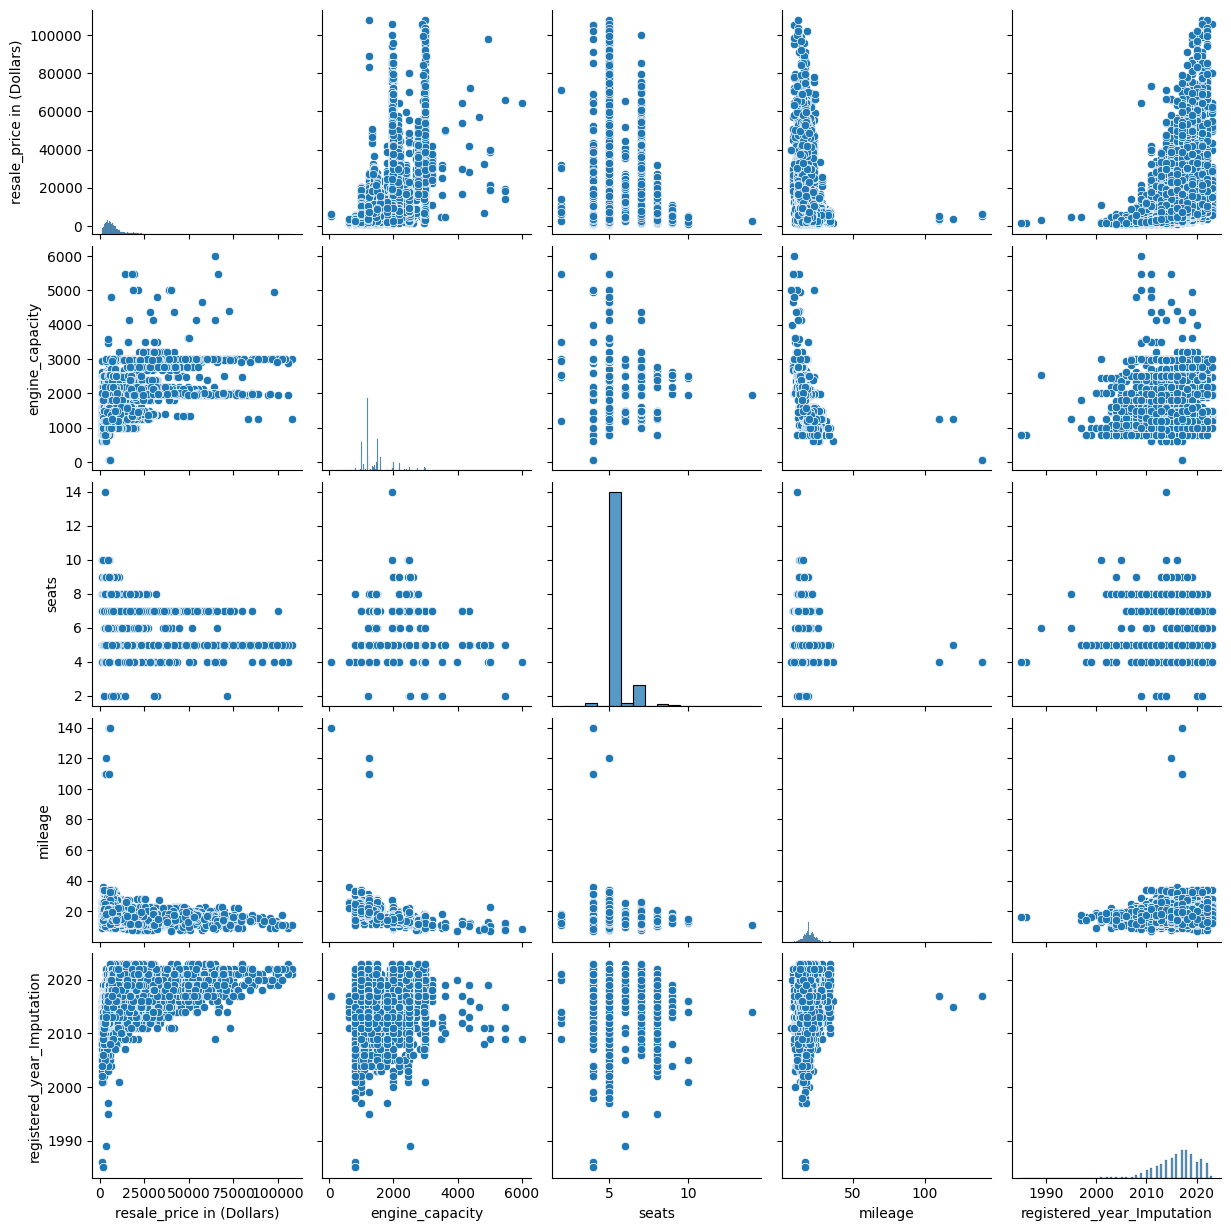

In [49]:
sns.pairplot(Car_df)
plt.show()

In [50]:
print(Car_df.columns)

Index(['full_name', 'resale_price in (Dollars)', 'registered_year',
       'engine_capacity', 'insurance', 'transmission_type', 'kms_driven',
       'owner_type', 'fuel_type', 'max_power', 'seats', 'mileage', 'body_type',
       'city', 'registered_year_Imputation'],
      dtype='object')


In [51]:
Car_df["resale_price"] = pd.to_numeric(Car_df["resale_price"].str.strip(r"₹ Lakh"), errors = "coerce")
Car_df["mileage"] = pd.to_numeric(Car_df["mileage"].str.strip(r"kmpl"), errors = "coerce")

KeyError: 'resale_price'

In [39]:
plt.figure(figsize= (8,4))
sns.scatterplot(
    data = Car_df,
    x = "kms_driven",
    y = "resale_price",
    hue = "owner_type",
    palette="viridis",
    s = 50,
    alpha = 0.9
)

plt.show()

ValueError: Could not interpret value `resale_price` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x400 with 0 Axes>

In [38]:
Car_df

,full_name,resale_price in (Dollars),registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation
0,2017 Maruti Baleno 1.2 Alpha,6059.22,2017,1197,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.40,Hatchback,Agra,2017
1,2018 Tata Hexa XTA,11117.84,2018,2179,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.60,MUV,Agra,2018
2,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra,2015
3,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra,2015
4,2009 Hyundai i10 Magna 1.1,1778.85,2009,1086,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81,Hatchback,Agra,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3613.30,Jul 2013,1198,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18.00,Sedan,Delhi,2013
17442,2016 Toyota Camry 2.5 Hybrid,23069.52,Jun 2016,2494,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16,Sedan,Delhi,2016
17443,2016 Toyota Corolla Altis GL MT,9283.40,Jun 2016,1798,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28,Sedan,Delhi,2016
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,15509.39,Jun 2019,1582,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01,SUV,Delhi,2019


# we make a histogram to see the the distribution of the price , we relaize that there is right skewness

KeyError: 'resale_price'

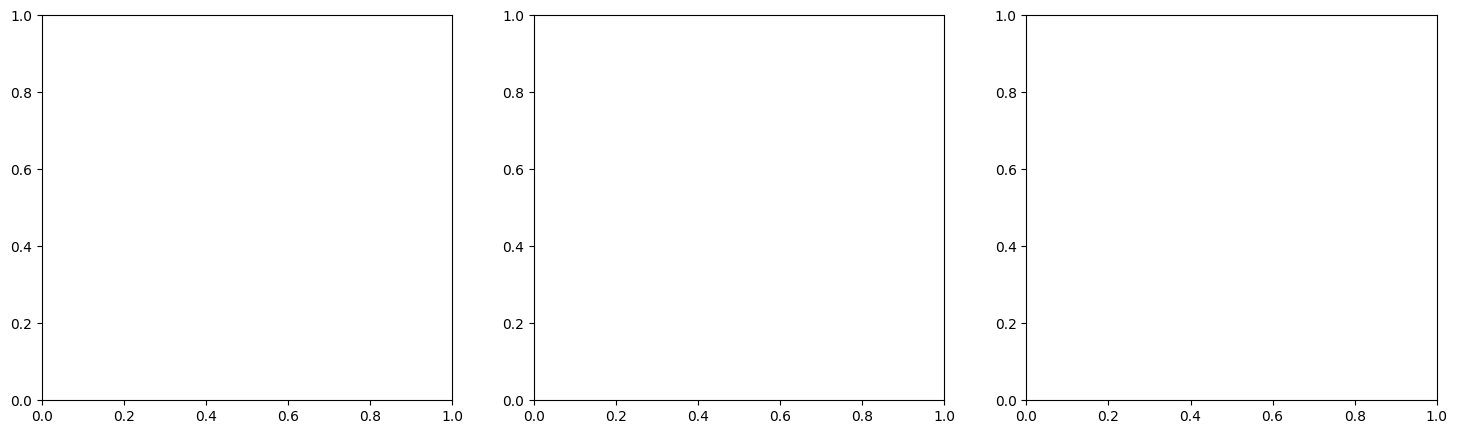

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1️⃣ Boxplot of resale price
sns.boxplot(x=Car_df['resale_price'], ax=axs[0])
axs[0].set_title("Boxplot: resale_price")

# 2️⃣ Histogram of resale price
axs[1].hist(Car_df['resale_price'], bins=50)
axs[1].set_title("Histogram: resale_price")

# 3️⃣ Boxplot of log-transformed resale price
sns.boxplot(x=np.log1p(Car_df['resale_price']), ax=axs[2])
axs[2].set_title("Boxplot: log1p(resale_price)")

plt.tight_layout()
plt.show()

In [47]:

plt.hist(Car_df['resale_price'], bins=50)
plt.show()

KeyError: 'resale_price'

### we make summary statistices for resale_price distribution and see that the mean(8.713414478270973) > median(5.96)  which indicates that there is right skew ->meaning there are a small number of very expensive cars pulling the average up
### The difference between the Q3 (9.055) and the maximum value (97.0) is very large. This confirms the likelihood of high-value outliers

In [8]:
Car_df['resale_price'].describe()


,resale_price
count,17212.000000
mean,8.713414
std,9.689100
min,1.000000
25%,3.850000
50%,5.900000
75%,9.200000
max,97.000000


# we try to take the log for resale_price so the graph become approximtly normal

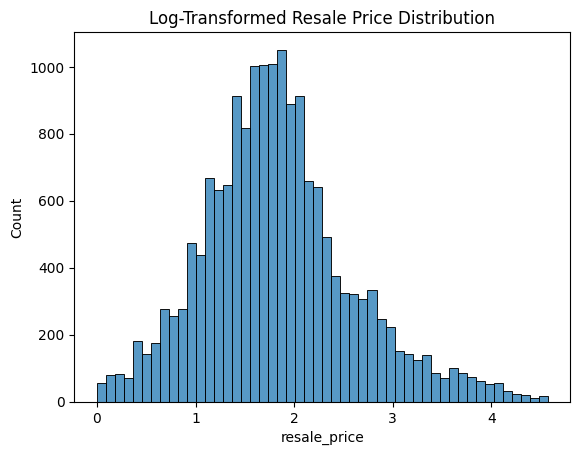

In [9]:
sns.histplot(np.log(Car_df['resale_price']), bins=50, edgecolor='black')
plt.title("Log-Transformed Resale Price Distribution")
plt.show()


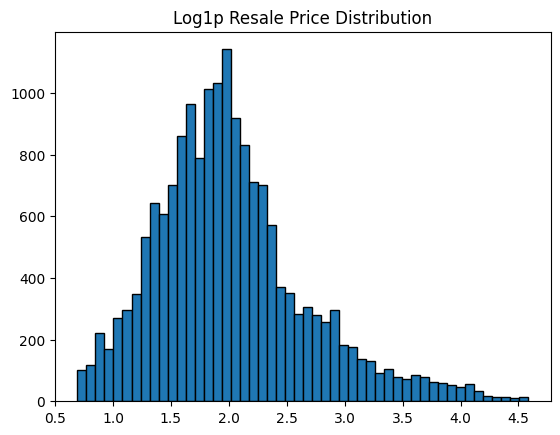

In [10]:
plt.hist(np.log1p(Car_df['resale_price']), bins=50, edgecolor='black')
plt.title("Log1p Resale Price Distribution")
plt.show()


<Axes: xlabel='resale_price'>

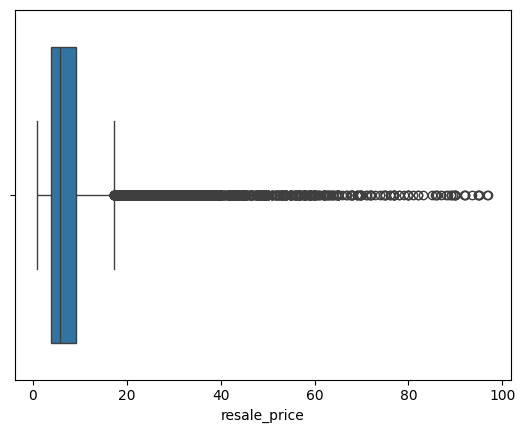

In [11]:
sns.boxplot(x=Car_df['resale_price'])

<Axes: xlabel='resale_price'>

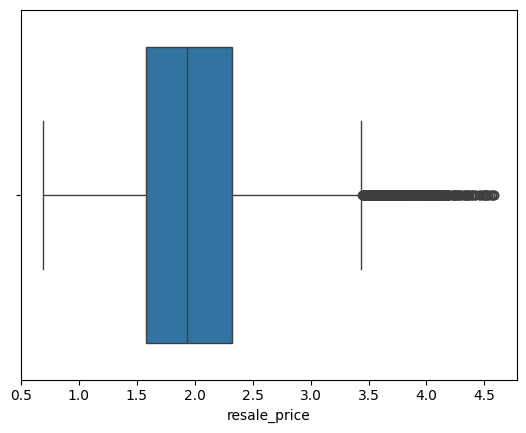

In [12]:
sns.boxplot(x=np.log1p(Car_df['resale_price']))


(0.0, 26.0)

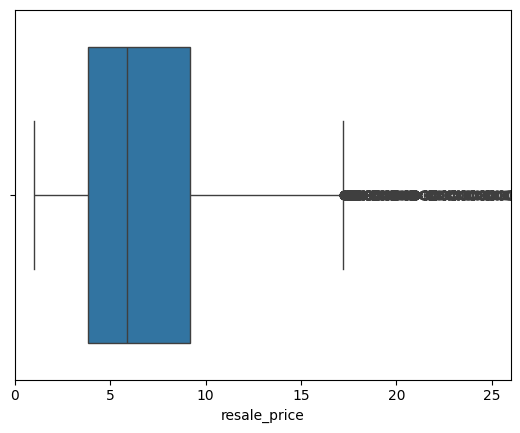

In [13]:
sns.boxplot(x=Car_df['resale_price'])
plt.xlim(0, Car_df['resale_price'].quantile(0.95))


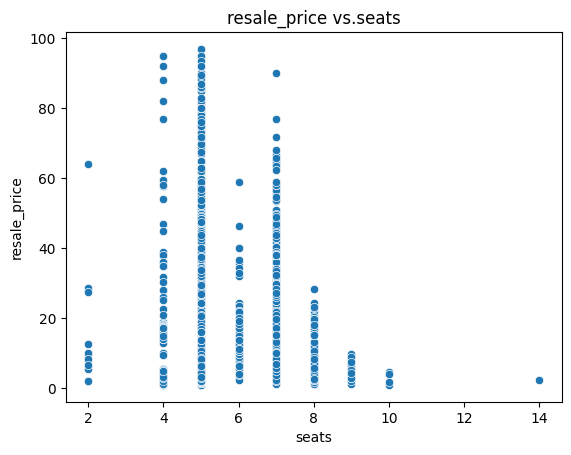

In [14]:
sns.scatterplot(x='seats', y='resale_price', data=Car_df)

plt.title('resale_price vs.seats')
plt.xlabel('seats')
plt.ylabel('resale_price')
plt.show()

<Axes: xlabel='seats', ylabel='resale_price'>

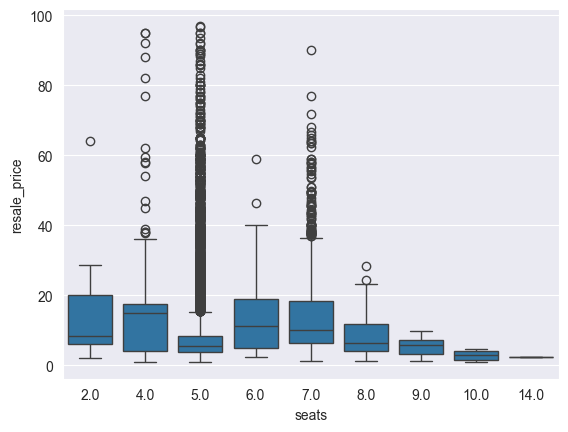

In [ ]:
import seaborn as sns
sns.boxplot(x='seats', y='resale_price', data=Car_df)

<Axes: xlabel='seats', ylabel='resale_price'>

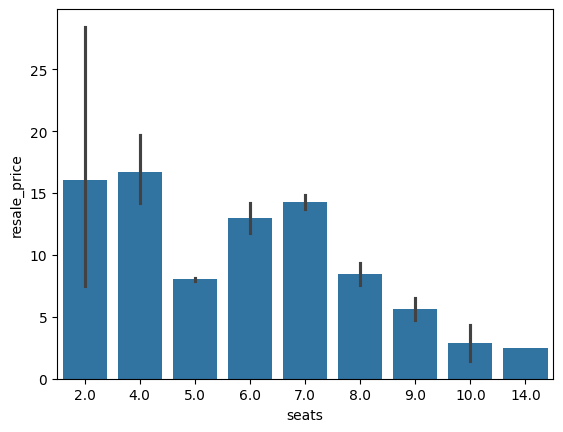

In [15]:
import seaborn as sns
sns.barplot(x='seats', y='resale_price', data=Car_df)

# The distribution of engine_capacity is highly skewed to the right (positive skew).
# The vast majority of cars in the dataset have an engine capacity between 1000 cc and 3000 cc.
# The bins between 3000 cc and 6000 cc are almost entirely empty or contain a very small number of cars. This suggests that cars with very large engine capacities  are rare outliers in this dataset.

TypeError: 'value' must be an instance of str or bytes, not a float

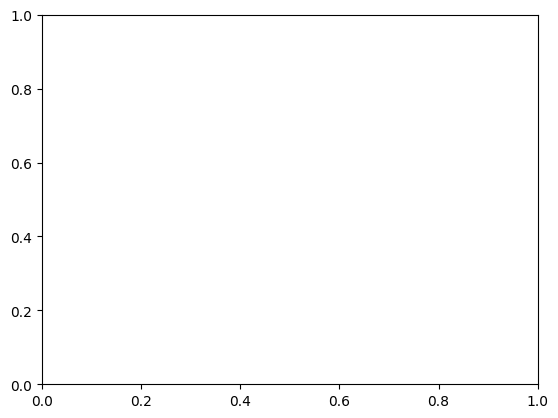

In [16]:
plt.hist(Car_df['engine_capacity'], bins=50)
plt.show()

<Axes: xlabel='engine_capacity', ylabel='resale_price'>

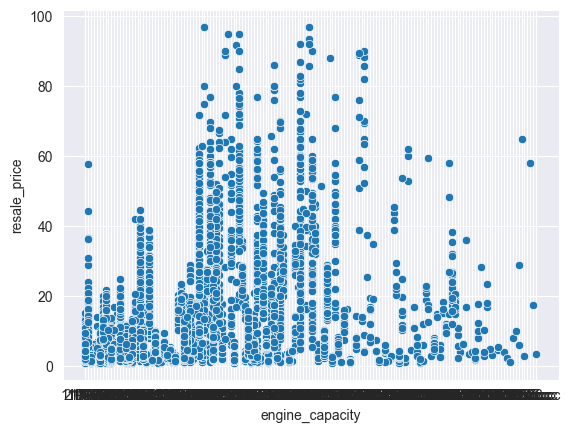

In [ ]:
import seaborn as sns
sns.scatterplot(x='engine_capacity', y='resale_price', data=Car_df)

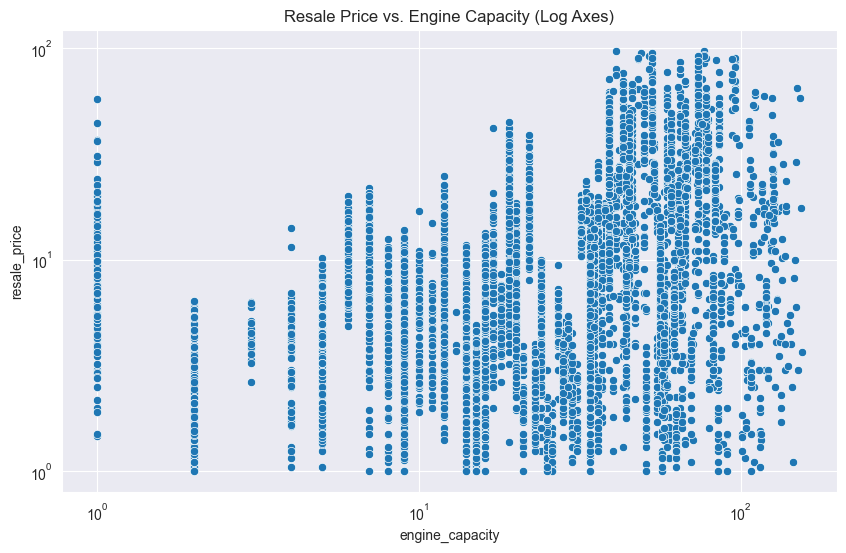

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='engine_capacity', y='resale_price', data=Car_df)

# Apply log scale to the y-axis (resale_price)
ax.set_yscale('log')

# You can also apply it to the x-axis (engine_capacity)
ax.set_xscale('log')

plt.title('Resale Price vs. Engine Capacity (Log Axes)')
plt.show()

In [ ]:
Car_df['sqrt_resale_price'] = np.sqrt(Car_df['resale_price'])
Car_df['sqrt_engine_capacity'] = np.sqrt(Car_df['engine_capacity'])

# 2. Plot the relationship using the new transformed columns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqrt_engine_capacity', y='sqrt_resale_price', data=Car_df)

plt.title('Square Root of Resale Price vs. Square Root of Engine Capacity')
plt.xlabel('Sqrt(Engine Capacity)')
plt.ylabel('Sqrt(Resale Price)')
plt.show()

TypeError: loop of ufunc does not support argument 0 of type str which has no callable sqrt method

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create the log-transformed engine capacity column
# This is assuming you haven't already transformed engine_capacity.
Car_df['log_engine_capacity'] = np.log(Car_df['engine_capacity'])

# Step 2: Plot the Box-Cox price vs. Log engine capacity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_engine_capacity', y='boxcox_resale_price', data=Car_df)

plt.title('Box-Cox Resale Price vs. Log Engine Capacity')
plt.xlabel('Log(Engine Capacity)')
plt.ylabel('Box-Cox(Resale Price)')
plt.show()

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

In [ ]:
Car_df["mileage"] = Car_df["mileage"].fillna(np.mean(Car_df["mileage"]))
Car_df["resale_price"] = Car_df["resale_price"].fillna(np.mean(Car_df["resale_price"]))

In [ ]:
np.corrcoef(Car_df["resale_price"], Car_df["mileage"])

array([[ 1.        , -0.28927369],
       [-0.28927369,  1.        ]])

# Preprocessing

In [17]:
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,2017 Maruti Baleno 1.2 Alpha,5.45,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.40,Hatchback,Agra
1,2018 Tata Hexa XTA,10.00,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.60,MUV,Agra
2,2015 Maruti Swift Dzire VXI,4.50,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra
3,2015 Maruti Swift Dzire VXI,4.50,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra
4,2009 Hyundai i10 Magna 1.1,1.60,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81,Hatchback,Agra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3.25,Jul 2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18.00,Sedan,Delhi
17442,2016 Toyota Camry 2.5 Hybrid,20.75,Jun 2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16,Sedan,Delhi
17443,2016 Toyota Corolla Altis GL MT,8.35,Jun 2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28,Sedan,Delhi
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,13.95,Jun 2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01,SUV,Delhi


In [18]:
Car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          17446 non-null  object 
 1   resale_price       17212 non-null  float64
 2   registered_year    17377 non-null  object 
 3   engine_capacity    17432 non-null  object 
 4   insurance          17439 non-null  object 
 5   transmission_type  17446 non-null  object 
 6   kms_driven         17443 non-null  object 
 7   owner_type         17401 non-null  object 
 8   fuel_type          17446 non-null  object 
 9   max_power          17344 non-null  object 
 10  seats              17436 non-null  float64
 11  mileage            16787 non-null  float64
 12  body_type          17446 non-null  object 
 13  city               17446 non-null  object 
dtypes: float64(3), object(11)
memory usage: 1.9+ MB


In [19]:
Missing_Summary=pd.DataFrame({
    'Number Of Nulls':Car_df.isna().sum(),
    'Nulls Precentage':round((Car_df.isna().sum()/len(Car_df))*100,2)
})
Missing_Summary

,Number Of Nulls,Nulls Precentage
full_name,0,0.00
resale_price,234,1.34
registered_year,69,0.40
engine_capacity,14,0.08
insurance,7,0.04
transmission_type,0,0.00
kms_driven,3,0.02
owner_type,45,0.26
fuel_type,0,0.00
max_power,102,0.58


# registered_year Column

In [20]:
Car_df[Car_df['registered_year'].isnull()]

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
215,2022 Audi e-tron 55 Sportback,NaN,NaN,0 cc,Third Party insurance,Automatic,"9,900 Kms",NaN,Electric,300kWbhp,5.0,NaN,SUV,Gurgaon
217,2020 Audi Q8 55 TFSI Quattro BSVI,89.00,NaN,2995 cc,Third Party insurance,Automatic,"18,000 Kms",NaN,Petrol,340bhp,5.0,9.80,SUV,Gurgaon
839,1986 Maruti 800 Std,1.40,NaN,796 cc,Third Party insurance,Manual,"90,000 Kms",First Owner,Petrol,37bhp,4.0,16.10,Hatchback,Chandigarh
1148,2000 Maruti Wagon R LX,NaN,NaN,998 cc,Third Party insurance,Manual,"80,000 Kms",Second Owner,Petrol,67.1bhp,5.0,18.90,Hatchback,Chandigarh
1436,2022 Mercedes-Benz GLB 220d 4Matic,64.00,NaN,1998 cc,Third Party insurance,Automatic,"6,500 Kms",NaN,Diesel,187.74bhp,7.0,NaN,SUV,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11217,1997 Maruti Zen LX,NaN,NaN,993 cc,Third Party insurance,Manual,"70,000 Kms",Fifth Owner,Petrol,60 PS,5.0,17.30,Hatchback,Bangalore
14005,1999 Hyundai Santro GLS II - Euro II,NaN,NaN,NaN,Third Party insurance,Manual,"1,20,000 Kms",Third Owner,Petrol,NaN,5.0,NaN,Hatchback,Delhi
14750,2019 Toyota Glanza G Smart Hybrid,6.35,NaN,1197 cc,Third Party insurance,Manual,"32,000 Kms",NaN,Petrol,88.50bhp,5.0,23.87,Hatchback,Delhi
16060,1999 Maruti 800 AC,NaN,NaN,796 cc,Third Party insurance,Manual,"1,10,000 Kms",First Owner,Petrol,37bhp,4.0,16.10,Hatchback,Mumbai


In [21]:
Car_df['registered_year_Imputation']=Car_df['full_name'].str[:4].astype(int)
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation
0,2017 Maruti Baleno 1.2 Alpha,5.45,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.40,Hatchback,Agra,2017
1,2018 Tata Hexa XTA,10.00,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.60,MUV,Agra,2018
2,2015 Maruti Swift Dzire VXI,4.50,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra,2015
3,2015 Maruti Swift Dzire VXI,4.50,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra,2015
4,2009 Hyundai i10 Magna 1.1,1.60,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81,Hatchback,Agra,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3.25,Jul 2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18.00,Sedan,Delhi,2013
17442,2016 Toyota Camry 2.5 Hybrid,20.75,Jun 2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16,Sedan,Delhi,2016
17443,2016 Toyota Corolla Altis GL MT,8.35,Jun 2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28,Sedan,Delhi,2016
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,13.95,Jun 2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01,SUV,Delhi,2019


In [22]:
Car_df['registered_year'][Car_df['registered_year'].isnull()] = Car_df['registered_year_Imputation'][Car_df['registered_year'].isnull()].astype(int)


/tmp/ipython-input-3066897378.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Car_df['registered_year'][Car_df['registered_year'].isnull()] = Car_df['registered_year_Imputation'][Car_df['registered_year'].isnull()].astype(int)
/tmp/ipyth

In [23]:
Car_df['registered_year']

,registered_year
0,2017
1,2018
2,2015
3,2015
4,2009
...,...
17441,Jul 2013
17442,Jun 2016
17443,Jun 2016
17444,Jun 2019


In [24]:
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation
0,2017 Maruti Baleno 1.2 Alpha,5.45,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.40,Hatchback,Agra,2017
1,2018 Tata Hexa XTA,10.00,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.60,MUV,Agra,2018
2,2015 Maruti Swift Dzire VXI,4.50,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra,2015
3,2015 Maruti Swift Dzire VXI,4.50,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra,2015
4,2009 Hyundai i10 Magna 1.1,1.60,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81,Hatchback,Agra,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3.25,Jul 2013,1198 cc,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18.00,Sedan,Delhi,2013
17442,2016 Toyota Camry 2.5 Hybrid,20.75,Jun 2016,2494 cc,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16,Sedan,Delhi,2016
17443,2016 Toyota Corolla Altis GL MT,8.35,Jun 2016,1798 cc,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28,Sedan,Delhi,2016
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,13.95,Jun 2019,1582 cc,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01,SUV,Delhi,2019


# engine_capacity Column

In [25]:
Car_df['engine_capacity']=Car_df['engine_capacity'].str.strip("c")
Car_df['engine_capacity']=Car_df['engine_capacity'].astype(float)
Car_df['engine_capacity']=Car_df['engine_capacity'].replace([0,'   nan'],np.nan)


In [26]:
Car_df['engine_capacity'].unique()

array([1197., 2179., 1086., 1047., 1196., 1198., 1462., 1493., 1396.,
        998., 1496., 1364., 1498., 2360., 1248.,  796., 1199., 2494.,
       1186., 1968.,  999., 1399., 1956.,  814., 1461., 1061.,  995.,
       1499.,  799., 1120., 1586.,  936., 1353., 1451., 1497., 1582.,
       1368., 2354., 2184., 1995., 2499.,   nan, 1395., 1998., 1798.,
       2143., 2967., 1796., 2995., 2894., 1984., 1298., 2999., 1950.,
       2198., 1799., 1591.,  624., 1598., 1991., 1172., 2755., 1373.,
       1405., 2982., 1997., 2498., 1999., 3198.,  909., 1193., 2609.,
       2199., 3498., 2993., 3604., 2487., 2998., 2987., 1996., 1896.,
       4663., 2523., 2393., 4951., 1495., 1969., 1797.,  993., 1595.,
       1597., 1341., 1242., 2696., 2925., 2979., 2996., 4367., 2477.,
       4999., 2835., 1599., 1468., 2953., 1150., 2489., 1332., 2157.,
       1794., 2400., 1948., 1993., 2362., 2200., 2956., 1596., 1390.,
       1490., 5461., 2112., 1194., 2596., 2496., 1349., 1330., 4134.,
       2694., 1482.,

<Axes: xlabel='engine_capacity', ylabel='Count'>

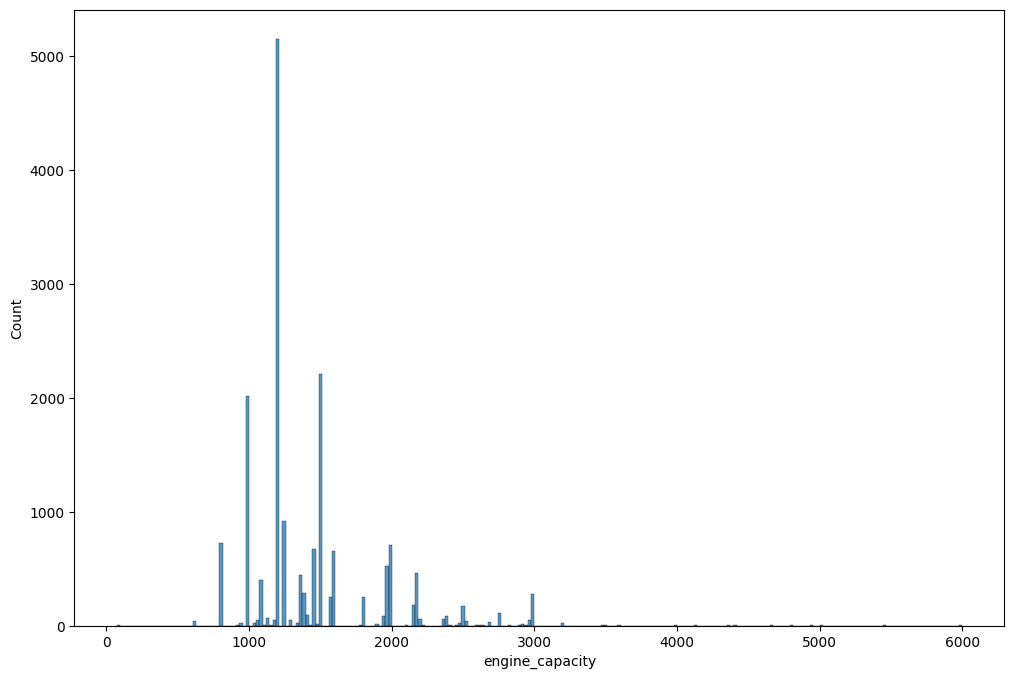

In [27]:
plt.figure(figsize= (12,8))
sns.histplot(data = Car_df,x='engine_capacity')

In [28]:
Car_df['engine_capacity'].unique()

array([1197., 2179., 1086., 1047., 1196., 1198., 1462., 1493., 1396.,
        998., 1496., 1364., 1498., 2360., 1248.,  796., 1199., 2494.,
       1186., 1968.,  999., 1399., 1956.,  814., 1461., 1061.,  995.,
       1499.,  799., 1120., 1586.,  936., 1353., 1451., 1497., 1582.,
       1368., 2354., 2184., 1995., 2499.,   nan, 1395., 1998., 1798.,
       2143., 2967., 1796., 2995., 2894., 1984., 1298., 2999., 1950.,
       2198., 1799., 1591.,  624., 1598., 1991., 1172., 2755., 1373.,
       1405., 2982., 1997., 2498., 1999., 3198.,  909., 1193., 2609.,
       2199., 3498., 2993., 3604., 2487., 2998., 2987., 1996., 1896.,
       4663., 2523., 2393., 4951., 1495., 1969., 1797.,  993., 1595.,
       1597., 1341., 1242., 2696., 2925., 2979., 2996., 4367., 2477.,
       4999., 2835., 1599., 1468., 2953., 1150., 2489., 1332., 2157.,
       1794., 2400., 1948., 1993., 2362., 2200., 2956., 1596., 1390.,
       1490., 5461., 2112., 1194., 2596., 2496., 1349., 1330., 4134.,
       2694., 1482.,

In [29]:
# Missing values imputation
Car_df['engine_capacity']=Car_df['engine_capacity'].fillna(Car_df['engine_capacity'].median()).astype(int)

In [30]:
Car_df['engine_capacity'].unique()

array([1197, 2179, 1086, 1047, 1196, 1198, 1462, 1493, 1396,  998, 1496,
       1364, 1498, 2360, 1248,  796, 1199, 2494, 1186, 1968,  999, 1399,
       1956,  814, 1461, 1061,  995, 1499,  799, 1120, 1586,  936, 1353,
       1451, 1497, 1582, 1368, 2354, 2184, 1995, 2499, 1395, 1998, 1798,
       2143, 2967, 1796, 2995, 2894, 1984, 1298, 2999, 1950, 2198, 1799,
       1591,  624, 1598, 1991, 1172, 2755, 1373, 1405, 2982, 1997, 2498,
       1999, 3198,  909, 1193, 2609, 2199, 3498, 2993, 3604, 2487, 2998,
       2987, 1996, 1896, 4663, 2523, 2393, 4951, 1495, 1969, 1797,  993,
       1595, 1597, 1341, 1242, 2696, 2925, 2979, 2996, 4367, 2477, 4999,
       2835, 1599, 1468, 2953, 1150, 2489, 1332, 2157, 1794, 2400, 1948,
       1993, 2362, 2200, 2956, 1596, 1390, 1490, 5461, 2112, 1194, 2596,
       2496, 1349, 1330, 4134, 2694, 1482, 2497, 3471, 2359, 5000, 2650,
       2231, 2446, 1985, 2148, 1781, 1898, 1299, 1339, 1389,   72, 1589,
       3597, 1422, 1108, 2698, 3200, 4806, 4395, 29

# Resale_Price

In [31]:
# resale_price ->(Lakh = 100,000)
Car_df

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation
0,2017 Maruti Baleno 1.2 Alpha,5.45,2017,1197,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.40,Hatchback,Agra,2017
1,2018 Tata Hexa XTA,10.00,2018,2179,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.60,MUV,Agra,2018
2,2015 Maruti Swift Dzire VXI,4.50,2015,1197,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra,2015
3,2015 Maruti Swift Dzire VXI,4.50,2015,1197,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra,2015
4,2009 Hyundai i10 Magna 1.1,1.60,2009,1086,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81,Hatchback,Agra,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3.25,Jul 2013,1198,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18.00,Sedan,Delhi,2013
17442,2016 Toyota Camry 2.5 Hybrid,20.75,Jun 2016,2494,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16,Sedan,Delhi,2016
17443,2016 Toyota Corolla Altis GL MT,8.35,Jun 2016,1798,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28,Sedan,Delhi,2016
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,13.95,Jun 2019,1582,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01,SUV,Delhi,2019


In [32]:
Car_df['resale_price']=Car_df['resale_price']*100000
Car_df['resale_price']=Car_df['resale_price']
Car_df['resale_price']=Car_df['resale_price']*0.01111784
Car_df['resale_price']=Car_df['resale_price'].round(2)
Car_df.rename(columns={'resale_price':'resale_price in (Dollars)'},inplace=True)

In [33]:
Car_df

,full_name,resale_price in (Dollars),registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation
0,2017 Maruti Baleno 1.2 Alpha,6059.22,2017,1197,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.40,Hatchback,Agra,2017
1,2018 Tata Hexa XTA,11117.84,2018,2179,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.60,MUV,Agra,2018
2,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra,2015
3,2015 Maruti Swift Dzire VXI,5003.03,2015,1197,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85,Sedan,Agra,2015
4,2009 Hyundai i10 Magna 1.1,1778.85,2009,1086,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81,Hatchback,Agra,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,2013 Honda Amaze VX i-Vtech,3613.30,Jul 2013,1198,Comprehensive,Manual,"89,000 Kms",Second Owner,Petrol,86.7bhp,5.0,18.00,Sedan,Delhi,2013
17442,2016 Toyota Camry 2.5 Hybrid,23069.52,Jun 2016,2494,Comprehensive,Automatic,"68,000 Kms",First Owner,Petrol,157.7bhp,5.0,19.16,Sedan,Delhi,2016
17443,2016 Toyota Corolla Altis GL MT,9283.40,Jun 2016,1798,Comprehensive,Manual,"81,000 Kms",First Owner,Petrol,138.03bhp,5.0,14.28,Sedan,Delhi,2016
17444,2019 Hyundai Creta 1.6 CRDi AT SX Plus,15509.39,Jun 2019,1582,Comprehensive,Automatic,"20,000 Kms",First Owner,Diesel,126.2bhp,5.0,17.01,SUV,Delhi,2019


In [34]:
Car_df[Car_df['kms_driven'].isnull()]

,full_name,resale_price in (Dollars),registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,registered_year_Imputation
733,2008 Maruti Wagon R LXI Minor,NaN,Jun 2008,1061,Not Available,Manual,NaN,First Owner,Petrol,67bhp,5.0,18.9,Hatchback,Lucknow,2008
2089,2007 Maruti Swift Ldi BSII,NaN,Jun 2007,1248,Not Available,Manual,NaN,Second Owner,Diesel,75PS,5.0,17.8,Hatchback,Jaipur,2007
9749,2016 Chevrolet Beat PS,2112.39,Jul 2016,1199,Not Available,Manual,NaN,First Owner,Petrol,76.8bhp,5.0,17.8,Hatchback,Gurgaon,2016


# Regression